In [ ]:
#!wget  http://104.197.136.14/ds/2016.04/2016.04C.multisnr.pkl.bz2 
  
!pip install -U -q PyDrive
import os
from os import chdir, listdir, stat
from sys import exit
import ast
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from pydrive.files import GoogleDriveFileList
import googleapiclient.errors


auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

local_download_path = os.path.expanduser('~/data')
try:
  os.makedirs(local_download_path)
except: pass

def upload_files(drive, folder_id, src_files, src_folder_name='.'):
    try:
        chdir(src_folder_name)
    except OSError:
        print(src_folder_name + ' is missing')
    for file1 in listdir('.'):
        statinfo = stat(file1)
        if file1 in src_files and statinfo.st_size > 0:
            print('Uploading ' + file1)
            f = drive.CreateFile(
                {"parents": [{"kind": "drive#fileLink", "id": folder_id}]})
            f.SetContentFile(file1)
            f.Upload()

def load_files(list_files):
  file_list = drive.ListFile(
    {'q': "'1NkJvoaOCcJiKuNHy7Eg3SLdpEp3fjGu3' in parents"}).GetList()

  for f in file_list:
    if f['title'] in list_files:
      print('title: %s, id: %s' % (f['title'], f['id']))
      fname = os.path.join(local_download_path, f['title'])
      print('downloading to {}'.format(fname))
      f_ = drive.CreateFile({'id': f['id']})
      f_.GetContentFile(fname)  




In [ ]:
!bzip2 -d ./2016.04C.multisnr.pkl.bz2
import _pickle
import numpy as np
with open ('./2016.04C.multisnr.pkl','rb') as f:
  data=_pickle.load(f, encoding="latin1")

In [ ]:
#reads the data set's keys 
mods,snrs = map(lambda j: sorted(list(set(map(lambda x: x[j], data.keys())))), [0,1])
  

In [ ]:
formatedData=[]
labels=[]
for mod in mods:
  for snr in snrs:
    formatedData.append(data[(mod,snr)])
    for i in range(data[(mod,snr)].shape[0]):
            
            labels.append((mod,snr))
formatedData = np.vstack(formatedData)


print ("Dataset formatted into shape: ",formatedData.shape)

print ("Dataset with SNRs: ",snrs)
print ("Dataset with Modulations: ",mods)
print ("Data prepared")
print (labels)

Dataset formatted into shape:  (162060, 2, 128)
Dataset with SNRs:  [-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
Dataset with Modulations:  ['8PSK', 'AM-DSB', 'AM-SSB', 'BPSK', 'CPFSK', 'GFSK', 'PAM4', 'QAM16', 'QAM64', 'QPSK', 'WBFM']
Data prepared
[('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK', -20), ('8PSK'

In [ ]:
np.random.seed(2018)
n_examples = formatedData.shape[0]
'''n_train = int(n_examples * 0.9)
train_idx = np.random.choice(range(0,n_examples), size=n_train, replace=False)
test_idx = list(set(range(0,n_examples))-set(train_idx))'''
train_idx = []
test_idx = []
validation_idx = []
labels_train=[]
labels_test=[]
labels_validation=[]
formatedData_train = []
formatedData_test = []
formatedData_validation = []
for label in data.keys():
  current_data = data[label]
  size = current_data.shape[0]
  for i in range(0,int(0.9*size)):
    formatedData_train.append([current_data[i]])
    labels_train.append(label[0])
  for i in range(int(0.9*size) , int(0.95*size) ):
    formatedData_test.append([current_data[i]])
    labels_test.append(label[0])
    
  for i in range(int(0.95*size) , size ):
    formatedData_validation.append([current_data[i]])
    labels_validation.append(label[0])
    
formatedData_train = np.vstack(formatedData_train)
formatedData_test = np.vstack(formatedData_test)
formatedData_validation = np.vstack(formatedData_validation)
print (formatedData_train.shape)
print (formatedData_test.shape)
print (formatedData_validation.shape)
print(len(labels_test))
print(len(labels_train))
print(len(labels_validation))
'''def to_onehot(yy):
    yy1 = np.zeros([len(list(yy)), max(yy)+1])
    yy1[np.arange(len(yy)),yy] = 1
    return yy1

Y_train = to_onehot(map(lambda x: mods.index(labels[x][0]), train_idx))
Y_test = to_onehot(map(lambda x: mods.index(labels[x][0]), test_idx))

in_shp = list(formatedData_train.shape[1:])
# print X_train.shape, in_shp
classes = mods
'''

(145760, 2, 128)
(8060, 2, 128)
(8240, 2, 128)
8060
145760
8240


'def to_onehot(yy):\n    yy1 = np.zeros([len(list(yy)), max(yy)+1])\n    yy1[np.arange(len(yy)),yy] = 1\n    return yy1\n\nY_train = to_onehot(map(lambda x: mods.index(labels[x][0]), train_idx))\nY_test = to_onehot(map(lambda x: mods.index(labels[x][0]), test_idx))\n\nin_shp = list(formatedData_train.shape[1:])\n# print X_train.shape, in_shp\nclasses = mods\n'

In [ ]:
import numpy as np
n= len(mods)
mods_matrix = np.zeros( (n , n) ,  dtype=np.int)
i =0
for mod_vector in mods_matrix:
  mod_vector[i] = 1
  i = i+1
mods_dict = {}
for mod , mod_vector in zip(mods , mods_matrix):
  mods_dict[mod] = mod_vector
  

labels_train_matrix = []
labels_test_matrix = []
labels_validation_matrix = []
for label in labels_train:
  labels_train_matrix.append(mods_dict[label])

for label in labels_test:
  labels_test_matrix.append(mods_dict[label])
  
for label in labels_validation:
  labels_validation_matrix.append(mods_dict[label])
  
  


In [ ]:
from sklearn.utils import shuffle
formatedData_train, labels_train_matrix = shuffle(formatedData_train, labels_train_matrix)
formatedData_test, labels_test_matrix = shuffle(formatedData_test, labels_test_matrix)
formatedData_validation, labels_validation_matrix = shuffle(formatedData_validation, labels_validation_matrix)
formatedData_train_2D = []
for row in formatedData_train:
  formatedData_train_2D.append(row.flatten())
formatedData_train_2D = np.vstack(formatedData_train_2D)

formatedData_test_2D = []
for row in formatedData_test:
  formatedData_test_2D.append(row.flatten())
formatedData_test_2D = np.vstack(formatedData_test_2D)

formatedData_validation_2D = []
for row in formatedData_validation:
  formatedData_validation_2D.append(row.flatten())
formatedData_validation_2D = np.vstack(formatedData_validation_2D)

folder_id = '1NkJvoaOCcJiKuNHy7Eg3SLdpEp3fjGu3'


In [ ]:
formatedData_train_diff = []
formatedData_test_diff = []
formatedData_validation_diff = []
#print(np.array(formatedData_train).shape)
for signal in formatedData_train:
  formatedData_train_diff.append ( np.gradient(signal) )
  
for signal in formatedData_test:
  formatedData_test_diff.append ( np.gradient(signal))
  
for signal in formatedData_validation:
  formatedData_validation_diff.append ( np.gradient(signal) )
  

formatedData_train_2D_diff = []
formatedData_test_2D_diff = []
formatedData_validation_2D_diff = []

for signal in formatedData_train_2D:
  formatedData_train_2D_diff.append ( np.gradient(signal) )
  
for signal in formatedData_test_2D:
  formatedData_test_2D_diff.append ( np.gradient(signal) )
  
for signal in formatedData_validation_2D:
  formatedData_validation_2D_diff.append ( np.gradient(signal) ) 
  
formatedData_train_3D_diff = np.array(formatedData_train_2D_diff).reshape(145760, 2, 128)
formatedData_test_3D_diff = np.array(formatedData_test_2D_diff).reshape(8060, 2, 128)
formatedData_validation_3D_diff = np.array(formatedData_validation_2D_diff).reshape(8240, 2, 128)


print(formatedData_train_3D_diff.shape)
print(formatedData_test_3D_diff.shape)
print(formatedData_validation_3D_diff.shape)

(145760, 2, 128)
(8060, 2, 128)
(8240, 2, 128)


In [ ]:
from scipy.interpolate import UnivariateSpline
formatedData_train_2D_int = []
formatedData_test_2D_int = []
formatedData_validation_2D_int = []
x= np.linspace(0,255,256)
for signal in formatedData_train_2D:
  f= UnivariateSpline(x, np.array(signal) , s=0 )
  fx=[]
  for x in range(0,257):
    fx[x] = f(x)
    fig=plt.plot(fx[x])
    
  
  f_int = f.antiderivative()
  signal_int = f_int.get_coeffs()
  formatedData_train_2D_int.append ( signal_int )
print (np.array(formatedData_train_2D_int).shape)

for signal in formatedData_test_2D:
  f= UnivariateSpline(x, np.array(signal) , s=0 )
  f_int = f.antiderivative()
  signal_int = f_int.get_coeffs()
  formatedData_test_2D_int.append ( signal_int )
print (np.array(formatedData_test_2D_int).shape)

for signal in formatedData_validation_2D:
  f= UnivariateSpline(x, np.array(signal) , s=0 )
  f_int = f.antiderivative()
  signal_int = f_int.get_coeffs()
  formatedData_validation_2D_int.append ( signal_int )
print (np.array(formatedData_validation_2D_int).shape)

IndexError: ignored

In [ ]:
Data_original_diff_train = np.hstack( (np.array(formatedData_train_2D) , np.array(formatedData_train_2D_diff )) )
Data_original_diff_test = np.hstack((np.array(formatedData_test_2D) , np.array(formatedData_test_2D_diff )) )
Data_original_diff_validation = np.hstack((np.array(formatedData_validation_2D) , np.array(formatedData_validation_2D_diff )))

print(Data_original_diff_train.shape)
print(Data_original_diff_test.shape)
print(Data_original_diff_validation.shape)



(145760, 512)
(8060, 512)
(8240, 512)


In [ ]:
Data_original_int_train = np.hstack( (np.array(formatedData_train_2D) , np.array(formatedData_train_2D_int )) )
Data_original_int_test = np.hstack((np.array(formatedData_test_2D) , np.array(formatedData_test_2D_int )) )
Data_original_int_validation = np.hstack((np.array(formatedData_validation_2D) , np.array(formatedData_validation_2D_int )))

print(Data_original_int_train.shape)
print(Data_original_int_test.shape)
print(Data_original_int_validation.shape)

(145760, 513)
(8060, 513)
(8240, 513)


In [ ]:
Data_int_diff_train = np.hstack( (np.array(formatedData_train_2D_int) , np.array(formatedData_train_2D_diff )) )
Data_int_diff_test = np.hstack((np.array(formatedData_test_2D_int) , np.array(formatedData_test_2D_diff )) )
Data_int_diff_validation = np.hstack((np.array(formatedData_validation_2D_int) , np.array(formatedData_validation_2D_diff )))

print(Data_original_int_train.shape)
print(Data_original_int_test.shape)
print(Data_original_int_validation.shape)

(145760, 513)
(8060, 513)
(8240, 513)


In [ ]:
Data_original_diff_int_train = np.hstack( (np.array(formatedData_train_2D) , np.array(formatedData_train_2D_diff ), np.array(formatedData_train_2D_int ) ) )
Data_original_diff_int_test = np.hstack((np.array(formatedData_test_2D) , np.array(formatedData_test_2D_diff ), np.array(formatedData_test_2D_int )) )
Data_original_diff_int_validation = np.hstack((np.array(formatedData_validation_2D) , np.array(formatedData_validation_2D_diff ), np.array(formatedData_validation_2D_int )))

print(Data_original_diff_int_train.shape)
print(Data_original_diff_int_test.shape)
print(Data_original_diff_int_validation.shape)

(145760, 769)
(8060, 769)
(8240, 769)


In [ ]:
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense , Activation,Dropout
from keras.models import model_from_json
earlystop = EarlyStopping(monitor='val_acc', min_delta=0, patience=50,verbose=0, mode='auto')
callbacks = [earlystop]

Using TensorFlow backend.


In [ ]:
#train on 2D original data with 4 hidden layer of 256, 128 , 64 ,32 nodes, for combined original and differentiated data

'''
model = Sequential ([
    Dense (256 , input_dim=(512)),
    Activation ('relu'),
    Dropout(0),
    Dense(128),
    Activation ('relu'),
    Dropout(0),
    Dense(64),
    Activation('relu'),
    Dropout(0),
    Dense(32),
    Activation('relu'),
    Dropout(0),
    Dense (11),
    Activation ('softmax'),
])

model.compile ( loss='categorical_crossentropy' , optimizer='adam' , metrics = ['accuracy'] )
model.summary()
np.array(Data_original_diff_train).size
np.array(labels_train_matrix).size
Data_original_diff_train = np.array(Data_original_diff_train)
labels_train_matrix = np.array(labels_train_matrix)
Data_original_diff_test = np.array(Data_original_diff_test)
labels_test_matrix = np.array(labels_test_matrix)
Data_original_diff_validation = np.array(Data_original_diff_validation)
labels_validation_matrix = np.array(labels_validation_matrix)
model.fit(Data_original_diff_train, labels_train_matrix, epochs=150,validation_data=(Data_original_diff_validation,labels_validation_matrix),callbacks=callbacks, batch_size=1024)
scores=model.evaluate(Data_original_diff_test, labels_test_matrix)
print("\n%s: %.2f%%" % (model.metrics_names[1] , scores[1]*100) )

# serialize model to JSON
model_json = model.to_json()
with open("combDNN1.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("combDNN1.h5")
print("Saved model to disk")
files = []
files.append('combDNN1.json')
files.append('combDNN1.h5')
upload_files(drive, folder_id, files)
'''

# load json and create model
files = []
files.append('combDNN1.json')
files.append('combDNN1.h5')
files_loaded  = load_files(files)
json_file = open('/content/data/combDNN1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights('/content/data/combDNN1.h5')
print("Loaded model from disk")
labels_test_matrix = np.array(labels_test_matrix)
# evaluate loaded model on test data
loaded_model.compile ( loss='categorical_crossentropy' , optimizer='adam' , metrics = ['accuracy'] )
scores=loaded_model.evaluate(Data_original_diff_test, labels_test_matrix)
print("\n%s: %.2f%%" % (loaded_model.metrics_names[1] , scores[1]*100) )


title: combDNN1.h5, id: 1yV8whkC8Z9WMarkpdNp74dbdk3aIL3ZJ
downloading to /root/data/combDNN1.h5
title: combDNN1.json, id: 1ZrrMaTG-eer7GJJoq7WcCBiWtJlVfbBZ
downloading to /root/data/combDNN1.json


FileNotFoundError: ignored

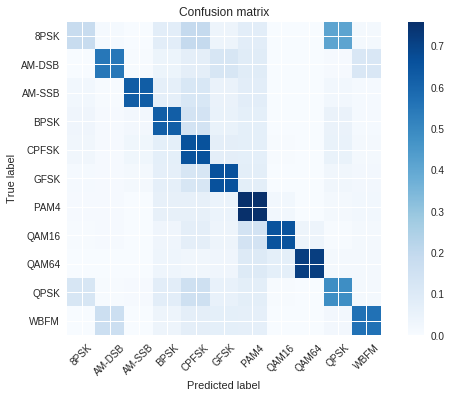

In [ ]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=[]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=[]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

classes = mods
test_Y_hat = loaded_model.predict(Data_original_diff_test, batch_size=1024)
conf = np.zeros([len(classes),len(classes)])
confnorm = np.zeros([len(classes),len(classes)])
Data_original_diff_test=np.array(Data_original_diff_test)
labels_test_matrix=np.array(labels_test_matrix)
for i in range(0,Data_original_diff_test.shape[0]):
    
    j = list(labels_test_matrix[i,:]).index(1)
    k = int(np.argmax(test_Y_hat[i,:]))
    conf[j,k] = conf[j,k] + 1

for i in range(0,len(classes)):
    confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
plot_confusion_matrix(confnorm, labels=classes)

In [ ]:
#train on 2D original data with 4 hidden layer of 256, 128 , 64 ,32 nodes, for combined original and differentiated data, dr 0.25
'''

model = Sequential ([
    Dense (256 , input_dim=(512)),
    Activation ('relu'),
    Dropout(0.25),
    Dense(128),
    Activation ('relu'),
    Dropout(0.25),
    Dense(64),
    Activation('relu'),
    Dropout(0.25),
    Dense(32),
    Activation('relu'),
    Dropout(0.25),
    Dense (11),
    Activation ('softmax'),
])

model.compile ( loss='categorical_crossentropy' , optimizer='adam' , metrics = ['accuracy'] )
model.summary()
np.array(Data_original_diff_train).size
np.array(labels_train_matrix).size
Data_original_diff_train = np.array(Data_original_diff_train)
labels_train_matrix = np.array(labels_train_matrix)
Data_original_diff_test = np.array(Data_original_diff_test)
labels_test_matrix = np.array(labels_test_matrix)
Data_original_diff_validation = np.array(Data_original_diff_validation)
labels_validation_matrix = np.array(labels_validation_matrix)
model.fit(Data_original_diff_train, labels_train_matrix, epochs=150,validation_data=(Data_original_diff_validation,labels_validation_matrix),callbacks=callbacks, batch_size=1024)
scores=model.evaluate(Data_original_diff_test, labels_test_matrix)
print("\n%s: %.2f%%" % (model.metrics_names[1] , scores[1]*100) )

# serialize model to JSON
model_json = model.to_json()
with open("combDNN2.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("combDNN2.h5")
print("Saved model to disk")
files = []
files.append('combDNN2.json')
files.append('combDNN2.h5')
upload_files(drive, folder_id, files)
'''
'''
# load json and create model
files = []
files.append('combDNN2.json')
files.append('combDNN2.h5')
files_loaded  = load_files(files)
json_file = open('/content/data/combDNN2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights('/content/data/combDNN2.h5')
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile ( loss='categorical_crossentropy' , optimizer='adam' , metrics = ['accuracy'] )
scores=loaded_model.evaluate(Data_original_diff_test , labels_test_matrix)
print("\n%s: %.2f%%" % (loaded_model.metrics_names[1] , scores[1]*100) )
'''

'\n# load json and create model\nfiles = []\nfiles.append(\'combDNN2.json\')\nfiles.append(\'combDNN2.h5\')\nfiles_loaded  = load_files(files)\njson_file = open(\'/content/data/combDNN2.json\', \'r\')\nloaded_model_json = json_file.read()\njson_file.close()\nloaded_model = model_from_json(loaded_model_json)\n\n# load weights into new model\nloaded_model.load_weights(\'/content/data/combDNN2.h5\')\nprint("Loaded model from disk")\n\n# evaluate loaded model on test data\nloaded_model.compile ( loss=\'categorical_crossentropy\' , optimizer=\'adam\' , metrics = [\'accuracy\'] )\nscores=loaded_model.evaluate(Data_original_diff_test , labels_test_matrix)\nprint("\n%s: %.2f%%" % (loaded_model.metrics_names[1] , scores[1]*100) )\n'

In [ ]:
#train on 2D original data with 4 hidden layer of 256, 128 , 64 ,32 nodes, for combined original and differentiated data, dr 0.5

'''
model = Sequential ([
    Dense (256 , input_dim=(512)),
    Activation ('relu'),
    Dropout(0.5),
    Dense(128),
    Activation ('relu'),
    Dropout(0.5),
    Dense(64),
    Activation('relu'),
    Dropout(0.5),
    Dense(32),
    Activation('relu'),
    Dropout(0.5),
    Dense (11),
    Activation ('softmax'),
])

model.compile ( loss='categorical_crossentropy' , optimizer='adam' , metrics = ['accuracy'] )
model.summary()
np.array(Data_original_diff_train).size
np.array(labels_train_matrix).size
Data_original_diff_train = np.array(Data_original_diff_train)
labels_train_matrix = np.array(labels_train_matrix)
Data_original_diff_test = np.array(Data_original_diff_test)
labels_test_matrix = np.array(labels_test_matrix)
Data_original_diff_validation = np.array(Data_original_diff_validation)
labels_validation_matrix = np.array(labels_validation_matrix)
model.fit(Data_original_diff_train, labels_train_matrix, epochs=300,validation_data=(Data_original_diff_validation,labels_validation_matrix),callbacks=callbacks, batch_size=1024)
scores=model.evaluate(Data_original_diff_test, labels_test_matrix)
print("\n%s: %.2f%%" % (model.metrics_names[1] , scores[1]*100) )

# serialize model to JSON
model_json = model.to_json()
with open("combDNN3.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("combDNN3.h5")
print("Saved model to disk")
files = []
files.append('combDNN3.json')
files.append('combDNN3.h5')
upload_files(drive, folder_id, files)
'''
'''
# load json and create model
files = []
files.append('combDNN3.json')
files.append('combDNN3.h5')
files_loaded  = load_files(files)
json_file = open('/content/data/combDNN3.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights('/content/data/combDNN2.h5')
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile ( loss='categorical_crossentropy' , optimizer='adam' , metrics = ['accuracy'] )
scores=loaded_model.evaluate(Data_original_diff_test , labels_test_matrix)
print("\n%s: %.2f%%" % (loaded_model.metrics_names[1] , scores[1]*100) )
'''

'\n# load json and create model\nfiles = []\nfiles.append(\'combDNN3.json\')\nfiles.append(\'combDNN3.h5\')\nfiles_loaded  = load_files(files)\njson_file = open(\'/content/data/combDNN3.json\', \'r\')\nloaded_model_json = json_file.read()\njson_file.close()\nloaded_model = model_from_json(loaded_model_json)\n\n# load weights into new model\nloaded_model.load_weights(\'/content/data/combDNN2.h5\')\nprint("Loaded model from disk")\n\n# evaluate loaded model on test data\nloaded_model.compile ( loss=\'categorical_crossentropy\' , optimizer=\'adam\' , metrics = [\'accuracy\'] )\nscores=loaded_model.evaluate(Data_original_diff_test , labels_test_matrix)\nprint("\n%s: %.2f%%" % (loaded_model.metrics_names[1] , scores[1]*100) )\n'

In [ ]:
#train on 2D original data with 4 hidden layer of 256, 128 , 64 ,32 nodes, for combined original and int data, dr 0.7
'''
model = Sequential ([
    Dense (256 , input_dim=(513)),
    Activation ('relu'),
    Dropout(0.7),
    Dense(128),
    Activation ('relu'),
    Dropout(0.7),
    Dense(64),
    Activation('relu'),
    Dropout(0.7),
    Dense(32),
    Activation('relu'),
    Dropout(0.7),
    Dense (11),
    Activation ('softmax'),
])

model.compile ( loss='categorical_crossentropy' , optimizer='adam' , metrics = ['accuracy'] )
model.summary()
np.array(Data_original_int_train).size
np.array(labels_train_matrix).size
Data_original_int_train = np.array(Data_original_int_train)
labels_train_matrix = np.array(labels_train_matrix)
Data_original_int_test = np.array(Data_original_int_test)
labels_test_matrix = np.array(labels_test_matrix)
Data_original_int_validation = np.array(Data_original_int_validation)
labels_validation_matrix = np.array(labels_validation_matrix)
model.fit(Data_original_int_train, labels_train_matrix, epochs=300,validation_data=(Data_original_int_validation,labels_validation_matrix),callbacks=callbacks, batch_size=1024)
scores=model.evaluate(Data_original_int_test, labels_test_matrix)
print("\n%s: %.2f%%" % (model.metrics_names[1] , scores[1]*100) )

# serialize model to JSON
model_json = model.to_json()
with open("combDNN4.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("combDNN4.h5")
print("Saved model to disk")
files = []
files.append('combDNN4.json')
files.append('combDNN4.h5')
upload_files(drive, folder_id, files)

'''
# load json and create model
files = []
files.append('combDNN4.json')
files.append('combDNN4.h5')
files_loaded  = load_files(files)
json_file = open('/content/data/combDNN4.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights('/content/data/combDNN4.h5')
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile ( loss='categorical_crossentropy' , optimizer='adam' , metrics = ['accuracy'] )
scores=loaded_model.evaluate(Data_original_int_test , labels_test_matrix)
print("\n%s: %.2f%%" % (loaded_model.metrics_names[1] , scores[1]*100) )


title: combDNN4.json, id: 1bAgPyqYn5tdqHDUf7GyygdoKS8C2gLvM
downloading to /content/data/combDNN4.json
title: combDNN4.h5, id: 1gQlRwdnXv4K7PPGU2b6UT2RYt1PXVjQp
downloading to /content/data/combDNN4.h5
title: combDNN4.json, id: 1xPkGZy6wzvpFf2esoAh1AehYulYmBo-s
downloading to /content/data/combDNN4.json
title: combDNN4.h5, id: 1TQw7tYIWJZ7cbrH_8fY8KXIyoaTdgfJ4
downloading to /content/data/combDNN4.h5
Loaded model from disk
8060/8060 [==============================] - 1s 75us/step

acc: 27.27%


In [ ]:
#train on 2D original data with 4 hidden layer of 256, 128 , 64 ,32 nodes, for combined diff and int data, dr 0.5

model = Sequential ([
    Dense (256 , input_dim=(513)),
    Activation ('relu'),
    Dropout(0.7),
    Dense(128),
    Activation ('relu'),
    Dropout(0.7),
    Dense(64),
    Activation('relu'),
    Dropout(0.7),
    Dense(32),
    Activation('relu'),
    Dropout(0.7),
    Dense (11),
    Activation ('softmax'),
])

model.compile ( loss='categorical_crossentropy' , optimizer='adam' , metrics = ['accuracy'] )
model.summary()
np.array(Data_int_diff_train).size
np.array(labels_train_matrix).size
Data_int_diff_train = np.array(Data_int_diff_train)
labels_train_matrix = np.array(labels_train_matrix)
Data_int_diff_test = np.array(Data_int_diff_test)
labels_test_matrix = np.array(labels_test_matrix)
Data_int_diff_validation = np.array(Data_int_diff_validation)
labels_validation_matrix = np.array(labels_validation_matrix)
model.fit(Data_int_diff_train, labels_train_matrix, epochs=300,validation_data=(Data_int_diff_validation,labels_validation_matrix),callbacks=callbacks, batch_size=1024)
scores=model.evaluate(Data_int_diff_test, labels_test_matrix)
print("\n%s: %.2f%%" % (model.metrics_names[1] , scores[1]*100) )

# serialize model to JSON
model_json = model.to_json()
with open("combDNN5.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("combDNN5.h5")
print("Saved model to disk")
files = []
files.append('combDNN5.json')
files.append('combDNN5.h5')
upload_files(drive, folder_id, files)

'''
# load json and create model
files = []
files.append('combDNN5.json')
files.append('combDNN5.h5')
files_loaded  = load_files(files)
json_file = open('/content/data/combDNN5.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights('/content/data/combDNN5.h5')
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile ( loss='categorical_crossentropy' , optimizer='adam' , metrics = ['accuracy'] )
scores=loaded_model.evaluate(Data_int_diff_test , labels_test_matrix)
print("\n%s: %.2f%%" % (loaded_model.metrics_names[1] , scores[1]*100) )
'''

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 256)               131584    
_________________________________________________________________
activation_26 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 128)               32896     
_________________________________________________________________
activation_27 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 64)                8256      
__________

145760/145760 [==============================] - 2s 13us/step - loss: 13.2702 - acc: 0.1407 - val_loss: 12.7232 - val_acc: 0.1689
Epoch 3/300
145760/145760 [==============================] - 2s 12us/step - loss: 13.0423 - acc: 0.1445 - val_loss: 11.8825 - val_acc: 0.1796
Epoch 4/300
145760/145760 [==============================] - 2s 13us/step - loss: 12.2024 - acc: 0.1453 - val_loss: 4.3770 - val_acc: 0.1081
Epoch 5/300
145760/145760 [==============================] - 2s 13us/step - loss: 8.5252 - acc: 0.1289 - val_loss: 2.3342 - val_acc: 0.0874
Epoch 6/300
145760/145760 [==============================] - 2s 12us/step - loss: 4.3374 - acc: 0.1308 - val_loss: 2.2989 - val_acc: 0.1529
Epoch 7/300
145760/145760 [==============================] - 2s 12us/step - loss: 3.0471 - acc: 0.1532 - val_loss: 2.2874 - val_acc: 0.1529
Epoch 8/300
 66560/145760 [============>.................] - ETA: 0s - loss: 2.7265 - acc: 0.1544

145760/145760 [==============================] - 2s 13us/step - loss: 2.6687 - acc: 0.1537 - val_loss: 2.2836 - val_acc: 0.1529
Epoch 9/300
145760/145760 [==============================] - 2s 12us/step - loss: 2.5474 - acc: 0.1534 - val_loss: 2.2825 - val_acc: 0.1529
Epoch 10/300
145760/145760 [==============================] - 2s 12us/step - loss: 2.4746 - acc: 0.1536 - val_loss: 2.2821 - val_acc: 0.1529
Epoch 11/300
145760/145760 [==============================] - 2s 12us/step - loss: 2.4267 - acc: 0.1528 - val_loss: 2.2821 - val_acc: 0.1529
Epoch 12/300
145760/145760 [==============================] - 2s 12us/step - loss: 2.3972 - acc: 0.1538 - val_loss: 2.2820 - val_acc: 0.1529
Epoch 13/300
145760/145760 [==============================] - 2s 12us/step - loss: 2.3752 - acc: 0.1531 - val_loss: 2.2820 - val_acc: 0.1529
Epoch 14/300
 57344/145760 [==========>...................] - ETA: 1s - loss: 2.3580 - acc: 0.1531

145760/145760 [==============================] - 2s 12us/step - loss: 2.3502 - acc: 0.1523 - val_loss: 2.2819 - val_acc: 0.1529
Epoch 15/300
145760/145760 [==============================] - 2s 12us/step - loss: 2.3406 - acc: 0.1520 - val_loss: 2.2818 - val_acc: 0.1529
Epoch 16/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.3304 - acc: 0.1533 - val_loss: 2.2817 - val_acc: 0.1529
Epoch 17/300
145760/145760 [==============================] - 2s 12us/step - loss: 2.3260 - acc: 0.1527 - val_loss: 2.2816 - val_acc: 0.1529
Epoch 18/300
145760/145760 [==============================] - 2s 12us/step - loss: 2.3137 - acc: 0.1533 - val_loss: 2.2813 - val_acc: 0.1529
Epoch 19/300
145760/145760 [==============================] - 2s 12us/step - loss: 2.3096 - acc: 0.1519 - val_loss: 2.2810 - val_acc: 0.1529
Epoch 20/300
 62464/145760 [===========>..................] - ETA: 1s - loss: 2.3051 - acc: 0.1556

145760/145760 [==============================] - 2s 13us/step - loss: 2.3048 - acc: 0.1537 - val_loss: 2.2805 - val_acc: 0.1529
Epoch 21/300
145760/145760 [==============================] - 2s 12us/step - loss: 2.3010 - acc: 0.1542 - val_loss: 2.2800 - val_acc: 0.1529
Epoch 22/300
145760/145760 [==============================] - 2s 12us/step - loss: 2.3002 - acc: 0.1530 - val_loss: 2.2793 - val_acc: 0.1529
Epoch 23/300
145760/145760 [==============================] - 2s 12us/step - loss: 2.2973 - acc: 0.1535 - val_loss: 2.2786 - val_acc: 0.1529
Epoch 24/300
145760/145760 [==============================] - 2s 12us/step - loss: 2.2926 - acc: 0.1542 - val_loss: 2.2777 - val_acc: 0.1529
Epoch 25/300
145760/145760 [==============================] - 2s 12us/step - loss: 2.2889 - acc: 0.1551 - val_loss: 2.2765 - val_acc: 0.1569
Epoch 26/300
 77824/145760 [===============>..............] - ETA: 0s - loss: 2.2928 - acc: 0.1556

145760/145760 [==============================] - 2s 12us/step - loss: 2.2906 - acc: 0.1552 - val_loss: 2.2755 - val_acc: 0.1579
Epoch 27/300
145760/145760 [==============================] - 2s 12us/step - loss: 2.2874 - acc: 0.1568 - val_loss: 2.2742 - val_acc: 0.1584
Epoch 28/300
145760/145760 [==============================] - 2s 12us/step - loss: 2.2860 - acc: 0.1560 - val_loss: 2.2730 - val_acc: 0.1591
Epoch 29/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.2839 - acc: 0.1553 - val_loss: 2.2716 - val_acc: 0.1593
Epoch 30/300
145760/145760 [==============================] - 2s 12us/step - loss: 2.2807 - acc: 0.1558 - val_loss: 2.2699 - val_acc: 0.1598
Epoch 31/300
145760/145760 [==============================] - 2s 12us/step - loss: 2.2780 - acc: 0.1569 - val_loss: 2.2677 - val_acc: 0.1606
Epoch 32/300
 67584/145760 [============>.................] - ETA: 0s - loss: 2.2734 - acc: 0.1606

145760/145760 [==============================] - 2s 13us/step - loss: 2.2748 - acc: 0.1580 - val_loss: 2.2656 - val_acc: 0.1612
Epoch 33/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.2726 - acc: 0.1588 - val_loss: 2.2634 - val_acc: 0.1618
Epoch 34/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.2711 - acc: 0.1594 - val_loss: 2.2612 - val_acc: 0.1625
Epoch 35/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.2686 - acc: 0.1609 - val_loss: 2.2586 - val_acc: 0.1633
Epoch 36/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.2673 - acc: 0.1609 - val_loss: 2.2560 - val_acc: 0.1640
Epoch 37/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.2648 - acc: 0.1616 - val_loss: 2.2526 - val_acc: 0.1654
Epoch 38/300
 56320/145760 [==========>...................] - ETA: 1s - loss: 2.2636 - acc: 0.1620

145760/145760 [==============================] - 2s 13us/step - loss: 2.2629 - acc: 0.1627 - val_loss: 2.2506 - val_acc: 0.1661
Epoch 39/300
145760/145760 [==============================] - 2s 12us/step - loss: 2.2611 - acc: 0.1632 - val_loss: 2.2485 - val_acc: 0.1669
Epoch 40/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.2601 - acc: 0.1654 - val_loss: 2.2460 - val_acc: 0.1677
Epoch 41/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.2578 - acc: 0.1652 - val_loss: 2.2446 - val_acc: 0.1681
Epoch 42/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.2552 - acc: 0.1655 - val_loss: 2.2440 - val_acc: 0.1683
Epoch 43/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.2557 - acc: 0.1642 - val_loss: 2.2430 - val_acc: 0.1687
Epoch 44/300
 62464/145760 [===========>..................] - ETA: 1s - loss: 2.2543 - acc: 0.1644

145760/145760 [==============================] - 2s 12us/step - loss: 2.2531 - acc: 0.1661 - val_loss: 2.2408 - val_acc: 0.1698
Epoch 45/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.2514 - acc: 0.1678 - val_loss: 2.2384 - val_acc: 0.1708
Epoch 46/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.2501 - acc: 0.1674 - val_loss: 2.2351 - val_acc: 0.1718
Epoch 47/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.2476 - acc: 0.1685 - val_loss: 2.2316 - val_acc: 0.1729
Epoch 48/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.2447 - acc: 0.1709 - val_loss: 2.2266 - val_acc: 0.1749
Epoch 49/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.2425 - acc: 0.1705 - val_loss: 2.2216 - val_acc: 0.1767
Epoch 50/300
 48128/145760 [========>.....................] - ETA: 1s - loss: 2.2412 - acc: 0.1730

145760/145760 [==============================] - 2s 13us/step - loss: 2.2399 - acc: 0.1725 - val_loss: 2.2186 - val_acc: 0.1777
Epoch 51/300
145760/145760 [==============================] - 2s 12us/step - loss: 2.2358 - acc: 0.1733 - val_loss: 2.2116 - val_acc: 0.1803
Epoch 52/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.2358 - acc: 0.1743 - val_loss: 2.2168 - val_acc: 0.1785
Epoch 53/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.2336 - acc: 0.1748 - val_loss: 2.2074 - val_acc: 0.1820
Epoch 54/300
145760/145760 [==============================] - 2s 12us/step - loss: 2.2334 - acc: 0.1754 - val_loss: 2.2140 - val_acc: 0.1795
Epoch 55/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.2388 - acc: 0.1724 - val_loss: 2.2175 - val_acc: 0.1784
Epoch 56/300
 50176/145760 [=========>....................] - ETA: 1s - loss: 2.2379 - acc: 0.1744

145760/145760 [==============================] - 2s 12us/step - loss: 2.2373 - acc: 0.1742 - val_loss: 2.2170 - val_acc: 0.1784
Epoch 57/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.2365 - acc: 0.1737 - val_loss: 2.2121 - val_acc: 0.1803
Epoch 58/300
145760/145760 [==============================] - 2s 12us/step - loss: 2.2347 - acc: 0.1749 - val_loss: 2.2145 - val_acc: 0.1792
Epoch 59/300
145760/145760 [==============================] - 2s 12us/step - loss: 2.2322 - acc: 0.1747 - val_loss: 2.2085 - val_acc: 0.1817
Epoch 60/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.2297 - acc: 0.1754 - val_loss: 2.2079 - val_acc: 0.1818
Epoch 61/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.2300 - acc: 0.1758 - val_loss: 2.2084 - val_acc: 0.1817
Epoch 62/300
 51200/145760 [=========>....................] - ETA: 1s - loss: 2.2324 - acc: 0.1765

145760/145760 [==============================] - 2s 12us/step - loss: 2.2266 - acc: 0.1772 - val_loss: 2.2052 - val_acc: 0.1828
Epoch 63/300
145760/145760 [==============================] - 2s 12us/step - loss: 2.2310 - acc: 0.1766 - val_loss: 2.2092 - val_acc: 0.1816
Epoch 64/300
145760/145760 [==============================] - 2s 12us/step - loss: 2.2290 - acc: 0.1758 - val_loss: 2.2051 - val_acc: 0.1829
Epoch 65/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.2286 - acc: 0.1776 - val_loss: 2.2019 - val_acc: 0.1837
Epoch 66/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.2263 - acc: 0.1780 - val_loss: 2.1945 - val_acc: 0.1871
Epoch 67/300
145760/145760 [==============================] - 2s 12us/step - loss: 2.2240 - acc: 0.1787 - val_loss: 2.1958 - val_acc: 0.1865
Epoch 68/300
 61440/145760 [===========>..................] - ETA: 1s - loss: 2.2200 - acc: 0.1794

145760/145760 [==============================] - 2s 13us/step - loss: 2.2257 - acc: 0.1777 - val_loss: 2.2006 - val_acc: 0.1848
Epoch 69/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.2325 - acc: 0.1779 - val_loss: 2.1986 - val_acc: 0.1860
Epoch 70/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.2330 - acc: 0.1757 - val_loss: 2.2024 - val_acc: 0.1846
Epoch 71/300
145760/145760 [==============================] - 2s 12us/step - loss: 2.2328 - acc: 0.1761 - val_loss: 2.2027 - val_acc: 0.1853
Epoch 72/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.2333 - acc: 0.1777 - val_loss: 2.1996 - val_acc: 0.1865
Epoch 73/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.2357 - acc: 0.1777 - val_loss: 2.1962 - val_acc: 0.1877
Epoch 74/300
 36864/145760 [======>.......................] - ETA: 1s - loss: 2.2383 - acc: 0.1746

145760/145760 [==============================] - 2s 13us/step - loss: 2.2363 - acc: 0.1766 - val_loss: 2.1999 - val_acc: 0.1869
Epoch 75/300
145760/145760 [==============================] - 2s 12us/step - loss: 2.2365 - acc: 0.1771 - val_loss: 2.2028 - val_acc: 0.1848
Epoch 76/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.2349 - acc: 0.1761 - val_loss: 2.2003 - val_acc: 0.1863
Epoch 77/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.2320 - acc: 0.1770 - val_loss: 2.1991 - val_acc: 0.1867
Epoch 78/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.2308 - acc: 0.1775 - val_loss: 2.2000 - val_acc: 0.1875
Epoch 79/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.2323 - acc: 0.1777 - val_loss: 2.1950 - val_acc: 0.1897
Epoch 80/300
 57344/145760 [==========>...................] - ETA: 1s - loss: 2.2318 - acc: 0.1781

145760/145760 [==============================] - 2s 13us/step - loss: 2.2301 - acc: 0.1784 - val_loss: 2.1898 - val_acc: 0.1919
Epoch 81/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.2311 - acc: 0.1794 - val_loss: 2.1967 - val_acc: 0.1891
Epoch 82/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.2312 - acc: 0.1790 - val_loss: 2.1929 - val_acc: 0.1899
Epoch 83/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.2304 - acc: 0.1804 - val_loss: 2.1898 - val_acc: 0.1928
Epoch 84/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.2270 - acc: 0.1811 - val_loss: 2.1871 - val_acc: 0.1965
Epoch 85/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.2308 - acc: 0.1808 - val_loss: 2.1932 - val_acc: 0.1956
Epoch 86/300
 41984/145760 [=======>......................] - ETA: 1s - loss: 2.2304 - acc: 0.1811

145760/145760 [==============================] - 2s 13us/step - loss: 2.2283 - acc: 0.1807 - val_loss: 2.1918 - val_acc: 0.1942
Epoch 87/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.2267 - acc: 0.1811 - val_loss: 2.1855 - val_acc: 0.1995
Epoch 88/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.2274 - acc: 0.1805 - val_loss: 2.1875 - val_acc: 0.1967
Epoch 89/300
145760/145760 [==============================] - 2s 12us/step - loss: 2.2259 - acc: 0.1822 - val_loss: 2.1810 - val_acc: 0.2034
Epoch 90/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.2259 - acc: 0.1842 - val_loss: 2.1788 - val_acc: 0.2057
Epoch 91/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.2255 - acc: 0.1843 - val_loss: 2.1828 - val_acc: 0.2028
Epoch 92/300
 47104/145760 [========>.....................] - ETA: 1s - loss: 2.2237 - acc: 0.1838

145760/145760 [==============================] - 2s 13us/step - loss: 2.2216 - acc: 0.1851 - val_loss: 2.1780 - val_acc: 0.2041
Epoch 93/300
145760/145760 [==============================] - 2s 12us/step - loss: 2.2209 - acc: 0.1862 - val_loss: 2.1743 - val_acc: 0.2086
Epoch 94/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.2195 - acc: 0.1866 - val_loss: 2.1738 - val_acc: 0.2108
Epoch 95/300
145760/145760 [==============================] - 2s 12us/step - loss: 2.2187 - acc: 0.1877 - val_loss: 2.1765 - val_acc: 0.2112
Epoch 96/300
145760/145760 [==============================] - 2s 12us/step - loss: 2.2191 - acc: 0.1868 - val_loss: 2.1722 - val_acc: 0.2188
Epoch 97/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.2170 - acc: 0.1893 - val_loss: 2.1648 - val_acc: 0.2313
Epoch 98/300
 59392/145760 [===========>..................] - ETA: 1s - loss: 2.2139 - acc: 0.1898

145760/145760 [==============================] - 2s 13us/step - loss: 2.2156 - acc: 0.1894 - val_loss: 2.1746 - val_acc: 0.2069
Epoch 99/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.2180 - acc: 0.1874 - val_loss: 2.1719 - val_acc: 0.2149
Epoch 100/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.2165 - acc: 0.1905 - val_loss: 2.1616 - val_acc: 0.2303
Epoch 101/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.2132 - acc: 0.1915 - val_loss: 2.1579 - val_acc: 0.2301
Epoch 102/300
145760/145760 [==============================] - 2s 12us/step - loss: 2.2136 - acc: 0.1914 - val_loss: 2.1623 - val_acc: 0.2244
Epoch 103/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.2136 - acc: 0.1915 - val_loss: 2.1584 - val_acc: 0.2333
Epoch 104/300
 43008/145760 [=======>......................] - ETA: 1s - loss: 2.2128 - acc: 0.1948

145760/145760 [==============================] - 2s 13us/step - loss: 2.2101 - acc: 0.1937 - val_loss: 2.1405 - val_acc: 0.2353
Epoch 105/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.2068 - acc: 0.1971 - val_loss: 2.1301 - val_acc: 0.2251
Epoch 106/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.2069 - acc: 0.1976 - val_loss: 2.1256 - val_acc: 0.2272
Epoch 107/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.2038 - acc: 0.1991 - val_loss: 2.1257 - val_acc: 0.2198
Epoch 108/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.1980 - acc: 0.2030 - val_loss: 2.1302 - val_acc: 0.2375
Epoch 109/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.1977 - acc: 0.2036 - val_loss: 2.1154 - val_acc: 0.2262
Epoch 110/300
 36864/145760 [======>.......................] - ETA: 1s - loss: 2.1929 - acc: 0.2066

145760/145760 [==============================] - 2s 13us/step - loss: 2.1970 - acc: 0.2060 - val_loss: 2.1088 - val_acc: 0.2226
Epoch 111/300
145760/145760 [==============================] - 2s 12us/step - loss: 2.1949 - acc: 0.2048 - val_loss: 2.1266 - val_acc: 0.2358
Epoch 112/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.1924 - acc: 0.2062 - val_loss: 2.1188 - val_acc: 0.2308
Epoch 113/300
145760/145760 [==============================] - 2s 12us/step - loss: 2.1929 - acc: 0.2052 - val_loss: 2.1157 - val_acc: 0.2328
Epoch 114/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.1931 - acc: 0.2048 - val_loss: 2.1094 - val_acc: 0.2312
Epoch 115/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.1896 - acc: 0.2081 - val_loss: 2.1067 - val_acc: 0.2288
Epoch 116/300
 57344/145760 [==========>...................] - ETA: 1s - loss: 2.1813 - acc: 0.2110

145760/145760 [==============================] - 2s 12us/step - loss: 2.1836 - acc: 0.2092 - val_loss: 2.1058 - val_acc: 0.2377
Epoch 117/300
145760/145760 [==============================] - 2s 12us/step - loss: 2.1814 - acc: 0.2108 - val_loss: 2.0887 - val_acc: 0.2260
Epoch 118/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.1767 - acc: 0.2128 - val_loss: 2.0856 - val_acc: 0.2177
Epoch 119/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.1751 - acc: 0.2128 - val_loss: 2.0791 - val_acc: 0.2096
Epoch 120/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.1741 - acc: 0.2141 - val_loss: 2.0758 - val_acc: 0.2200
Epoch 121/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.1702 - acc: 0.2146 - val_loss: 2.0797 - val_acc: 0.2132
Epoch 122/300
 41984/145760 [=======>......................] - ETA: 1s - loss: 2.1698 - acc: 0.2150

145760/145760 [==============================] - 2s 13us/step - loss: 2.1669 - acc: 0.2160 - val_loss: 2.0755 - val_acc: 0.2172
Epoch 123/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.1626 - acc: 0.2163 - val_loss: 2.0821 - val_acc: 0.2024
Epoch 124/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.1586 - acc: 0.2171 - val_loss: 2.0623 - val_acc: 0.2201
Epoch 125/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.1566 - acc: 0.2179 - val_loss: 2.0636 - val_acc: 0.2280
Epoch 126/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.1606 - acc: 0.2168 - val_loss: 2.0754 - val_acc: 0.2221
Epoch 127/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.1540 - acc: 0.2193 - val_loss: 2.0682 - val_acc: 0.2081
Epoch 128/300
 50176/145760 [=========>....................] - ETA: 1s - loss: 2.1542 - acc: 0.2194

145760/145760 [==============================] - 2s 13us/step - loss: 2.1518 - acc: 0.2191 - val_loss: 2.0578 - val_acc: 0.2160
Epoch 129/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.1485 - acc: 0.2191 - val_loss: 2.0522 - val_acc: 0.2155
Epoch 130/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.1495 - acc: 0.2206 - val_loss: 2.0466 - val_acc: 0.2201
Epoch 131/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.1467 - acc: 0.2195 - val_loss: 2.0517 - val_acc: 0.2175
Epoch 132/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.1426 - acc: 0.2199 - val_loss: 2.0417 - val_acc: 0.2131
Epoch 133/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.1396 - acc: 0.2206 - val_loss: 2.0401 - val_acc: 0.2191
Epoch 134/300
 31744/145760 [=====>........................] - ETA: 1s - loss: 2.1380 - acc: 0.2238

145760/145760 [==============================] - 2s 13us/step - loss: 2.1387 - acc: 0.2214 - val_loss: 2.0434 - val_acc: 0.2123
Epoch 135/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.1373 - acc: 0.2227 - val_loss: 2.0460 - val_acc: 0.2138
Epoch 136/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.1307 - acc: 0.2233 - val_loss: 2.0381 - val_acc: 0.2221
Epoch 137/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.1318 - acc: 0.2228 - val_loss: 2.0273 - val_acc: 0.2210
Epoch 138/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.1288 - acc: 0.2220 - val_loss: 2.0276 - val_acc: 0.2292
Epoch 139/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.1297 - acc: 0.2232 - val_loss: 2.0285 - val_acc: 0.2175
Epoch 140/300
 48128/145760 [========>.....................] - ETA: 1s - loss: 2.1254 - acc: 0.2255

145760/145760 [==============================] - 2s 12us/step - loss: 2.1312 - acc: 0.2239 - val_loss: 2.0302 - val_acc: 0.2313
Epoch 141/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.1318 - acc: 0.2229 - val_loss: 2.0329 - val_acc: 0.2286
Epoch 142/300
145760/145760 [==============================] - 2s 12us/step - loss: 2.1297 - acc: 0.2233 - val_loss: 2.0369 - val_acc: 0.2216
Epoch 143/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.1242 - acc: 0.2235 - val_loss: 2.0232 - val_acc: 0.2163
Epoch 144/300
145760/145760 [==============================] - 2s 12us/step - loss: 2.1194 - acc: 0.2250 - val_loss: 2.0141 - val_acc: 0.2254
Epoch 145/300
145760/145760 [==============================] - 2s 12us/step - loss: 2.1200 - acc: 0.2263 - val_loss: 2.0232 - val_acc: 0.2242
Epoch 146/300
 58368/145760 [===========>..................] - ETA: 1s - loss: 2.1168 - acc: 0.2241

145760/145760 [==============================] - 2s 12us/step - loss: 2.1172 - acc: 0.2251 - val_loss: 2.0199 - val_acc: 0.2159
Epoch 147/300
145760/145760 [==============================] - 2s 12us/step - loss: 2.1195 - acc: 0.2264 - val_loss: 2.0130 - val_acc: 0.2188
Epoch 148/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.1129 - acc: 0.2259 - val_loss: 2.0159 - val_acc: 0.2215
Epoch 149/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.1118 - acc: 0.2290 - val_loss: 2.0160 - val_acc: 0.2195
Epoch 150/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.1111 - acc: 0.2283 - val_loss: 2.0048 - val_acc: 0.2300
Epoch 151/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.1111 - acc: 0.2288 - val_loss: 2.0140 - val_acc: 0.2117
Epoch 152/300
 51200/145760 [=========>....................] - ETA: 1s - loss: 2.1097 - acc: 0.2292

145760/145760 [==============================] - 2s 13us/step - loss: 2.1100 - acc: 0.2291 - val_loss: 2.0146 - val_acc: 0.2271
Epoch 153/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.1096 - acc: 0.2293 - val_loss: 2.0101 - val_acc: 0.2261
Epoch 154/300
145760/145760 [==============================] - 2s 12us/step - loss: 2.1072 - acc: 0.2284 - val_loss: 2.0096 - val_acc: 0.2182
Epoch 155/300
145760/145760 [==============================] - 2s 12us/step - loss: 2.1063 - acc: 0.2289 - val_loss: 2.0141 - val_acc: 0.2160
Epoch 156/300
145760/145760 [==============================] - 2s 12us/step - loss: 2.1092 - acc: 0.2283 - val_loss: 2.0080 - val_acc: 0.2239
Epoch 157/300
145760/145760 [==============================] - 2s 12us/step - loss: 2.1134 - acc: 0.2283 - val_loss: 2.0198 - val_acc: 0.2144
Epoch 158/300
 57344/145760 [==========>...................] - ETA: 1s - loss: 2.1059 - acc: 0.2292

145760/145760 [==============================] - 2s 13us/step - loss: 2.1052 - acc: 0.2290 - val_loss: 2.0072 - val_acc: 0.2250
Epoch 159/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.1036 - acc: 0.2290 - val_loss: 2.0065 - val_acc: 0.2317
Epoch 160/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.1089 - acc: 0.2292 - val_loss: 2.0151 - val_acc: 0.2166
Epoch 161/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.1076 - acc: 0.2298 - val_loss: 2.0203 - val_acc: 0.2371
Epoch 162/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.1123 - acc: 0.2283 - val_loss: 2.0228 - val_acc: 0.2263
Epoch 163/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.1068 - acc: 0.2294 - val_loss: 2.0078 - val_acc: 0.2165
Epoch 164/300
 55296/145760 [==========>...................] - ETA: 1s - loss: 2.1051 - acc: 0.2286

145760/145760 [==============================] - 2s 13us/step - loss: 2.1043 - acc: 0.2289 - val_loss: 2.0050 - val_acc: 0.2212
Epoch 165/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.0968 - acc: 0.2311 - val_loss: 2.0057 - val_acc: 0.2255
Epoch 166/300
8060/8060 [==============================] - 1s 83us/step

acc: 23.08%
Saved model to disk
Uploading combDNN5.json
Uploading combDNN5.h5


'\n# load json and create model\nfiles = []\nfiles.append(\'combDNN5.json\')\nfiles.append(\'combDNN5.h5\')\nfiles_loaded  = load_files(files)\njson_file = open(\'/content/data/combDNN5.json\', \'r\')\nloaded_model_json = json_file.read()\njson_file.close()\nloaded_model = model_from_json(loaded_model_json)\n\n# load weights into new model\nloaded_model.load_weights(\'/content/data/combDNN5.h5\')\nprint("Loaded model from disk")\n\n# evaluate loaded model on test data\nloaded_model.compile ( loss=\'categorical_crossentropy\' , optimizer=\'adam\' , metrics = [\'accuracy\'] )\nscores=loaded_model.evaluate(Data_int_diff_test , labels_test_matrix)\nprint("\n%s: %.2f%%" % (loaded_model.metrics_names[1] , scores[1]*100) )\n'

In [ ]:
#train on 2D original data with 4 hidden layer of 256, 128 , 64 ,32 nodes, for combined org,diff and int data, dr 0.7
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense , Activation,Dropout
from keras.models import model_from_json
earlystop = EarlyStopping(monitor='val_acc', min_delta=0, patience=50,verbose=0, mode='auto')
callbacks = [earlystop]
model = Sequential ([
    Dense (256 , input_dim=(769)),
    Activation ('relu'),
    Dropout(0.7),
    Dense(128),
    Activation ('relu'),
    Dropout(0.7),
    Dense(64),
    Activation('relu'),
    Dropout(0.7),
    Dense(32),
    Activation('relu'),
    Dropout(0.7),
    Dense (11),
    Activation ('softmax'),
])

model.compile ( loss='categorical_crossentropy' , optimizer='adam' , metrics = ['accuracy'] )
model.summary()
np.array(Data_original_diff_int_train).size
np.array(labels_train_matrix).size
Data_original_diff_int_train = np.array(Data_original_diff_int_train)
labels_train_matrix = np.array(labels_train_matrix)
Data_original_diff_int_test= np.array(Data_original_diff_int_test)
labels_test_matrix = np.array(labels_test_matrix)
Data_original_diff_int_validation = np.array(Data_original_diff_int_validation)
labels_validation_matrix = np.array(labels_validation_matrix)
model.fit(Data_original_diff_int_train, labels_train_matrix, epochs=300,validation_data=(Data_original_diff_int_validation,labels_validation_matrix),callbacks=callbacks, batch_size=1024)
scores=model.evaluate(Data_original_diff_int_test, labels_test_matrix)
print("\n%s: %.2f%%" % (model.metrics_names[1] , scores[1]*100) )

# serialize model to JSON
model_json = model.to_json()
with open("combDNN6.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("combDNN6.h5")
print("Saved model to disk")
files = []
files.append('combDNN6.json')
files.append('combDNN6.h5')
upload_files(drive, folder_id, files)

'''
# load json and create model
files = []
files.append('combDNN6.json')
files.append('combDNN6.h5')
files_loaded  = load_files(files)
json_file = open('/content/data/combDNN6.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights('/content/data/combDNN6.h5')
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile ( loss='categorical_crossentropy' , optimizer='adam' , metrics = ['accuracy'] )
scores=loaded_model.evaluate(Data_original_diff_int_test , labels_test_matrix)
print("\n%s: %.2f%%" % (loaded_model.metrics_names[1] , scores[1]*100) )
'''

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 256)               197120    
_________________________________________________________________
activation_36 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 128)               32896     
_________________________________________________________________
activation_37 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 64)                8256      
__________

145760/145760 [==============================] - 2s 14us/step - loss: 12.9619 - acc: 0.1331 - val_loss: 6.9888 - val_acc: 0.1415
Epoch 3/300
145760/145760 [==============================] - 2s 14us/step - loss: 11.1916 - acc: 0.1362 - val_loss: 2.3476 - val_acc: 0.0874
Epoch 4/300
145760/145760 [==============================] - 2s 14us/step - loss: 6.8498 - acc: 0.1232 - val_loss: 2.3035 - val_acc: 0.1536
Epoch 5/300
145760/145760 [==============================] - 2s 14us/step - loss: 3.9534 - acc: 0.1504 - val_loss: 2.2877 - val_acc: 0.1529
Epoch 6/300
145760/145760 [==============================] - 2s 14us/step - loss: 3.0527 - acc: 0.1517 - val_loss: 2.2835 - val_acc: 0.1529
Epoch 7/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.7347 - acc: 0.1533 - val_loss: 2.2825 - val_acc: 0.1529


Epoch 8/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.5811 - acc: 0.1538 - val_loss: 2.2822 - val_acc: 0.1529
Epoch 9/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.4991 - acc: 0.1522 - val_loss: 2.2821 - val_acc: 0.1529
Epoch 10/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.4436 - acc: 0.1535 - val_loss: 2.2821 - val_acc: 0.1529
Epoch 11/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.4135 - acc: 0.1534 - val_loss: 2.2821 - val_acc: 0.1529
Epoch 12/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.3866 - acc: 0.1523 - val_loss: 2.2821 - val_acc: 0.1529
Epoch 13/300
139264/145760 [===========================>..] - ETA: 0s - loss: 2.3620 - acc: 0.1530

145760/145760 [==============================] - 2s 14us/step - loss: 2.3620 - acc: 0.1528 - val_loss: 2.2821 - val_acc: 0.1529
Epoch 14/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.3433 - acc: 0.1535 - val_loss: 2.2820 - val_acc: 0.1529
Epoch 15/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.3378 - acc: 0.1542 - val_loss: 2.2820 - val_acc: 0.1529
Epoch 16/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.3333 - acc: 0.1533 - val_loss: 2.2819 - val_acc: 0.1529
Epoch 17/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.3251 - acc: 0.1531 - val_loss: 2.2819 - val_acc: 0.1529
Epoch 18/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.3217 - acc: 0.1527 - val_loss: 2.2817 - val_acc: 0.1529
Epoch 19/300
  9216/145760 [>.............................] - ETA: 2s - loss: 2.3110 - acc: 0.1554

145760/145760 [==============================] - 2s 14us/step - loss: 2.3141 - acc: 0.1535 - val_loss: 2.2815 - val_acc: 0.1529
Epoch 20/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.3114 - acc: 0.1533 - val_loss: 2.2811 - val_acc: 0.1529
Epoch 21/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.3075 - acc: 0.1536 - val_loss: 2.2805 - val_acc: 0.1529
Epoch 22/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.3019 - acc: 0.1536 - val_loss: 2.2799 - val_acc: 0.1529
Epoch 23/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.3000 - acc: 0.1542 - val_loss: 2.2790 - val_acc: 0.1529
Epoch 24/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2978 - acc: 0.1527 - val_loss: 2.2778 - val_acc: 0.1561
Epoch 25/300
  1024/145760 [..............................] - ETA: 3s - loss: 2.2899 - acc: 0.1562

145760/145760 [==============================] - 2s 14us/step - loss: 2.2956 - acc: 0.1539 - val_loss: 2.2764 - val_acc: 0.1569
Epoch 26/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2914 - acc: 0.1550 - val_loss: 2.2748 - val_acc: 0.1580
Epoch 27/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2887 - acc: 0.1549 - val_loss: 2.2736 - val_acc: 0.1584
Epoch 28/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2877 - acc: 0.1541 - val_loss: 2.2715 - val_acc: 0.1591
Epoch 29/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2847 - acc: 0.1562 - val_loss: 2.2699 - val_acc: 0.1596
Epoch 30/300
144384/145760 [============================>.] - ETA: 0s - loss: 2.2824 - acc: 0.1572

145760/145760 [==============================] - 2s 14us/step - loss: 2.2821 - acc: 0.1573 - val_loss: 2.2681 - val_acc: 0.1601
Epoch 31/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2808 - acc: 0.1578 - val_loss: 2.2660 - val_acc: 0.1608
Epoch 32/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2777 - acc: 0.1589 - val_loss: 2.2638 - val_acc: 0.1614
Epoch 33/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2754 - acc: 0.1595 - val_loss: 2.2617 - val_acc: 0.1620
Epoch 34/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2717 - acc: 0.1595 - val_loss: 2.2593 - val_acc: 0.1629
Epoch 35/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2712 - acc: 0.1606 - val_loss: 2.2559 - val_acc: 0.1640
Epoch 36/300
 13312/145760 [=>............................] - ETA: 1s - loss: 2.2720 - acc: 0.1619

145760/145760 [==============================] - 2s 14us/step - loss: 2.2687 - acc: 0.1621 - val_loss: 2.2526 - val_acc: 0.1653
Epoch 37/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2646 - acc: 0.1630 - val_loss: 2.2515 - val_acc: 0.1654
Epoch 38/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2637 - acc: 0.1639 - val_loss: 2.2502 - val_acc: 0.1659
Epoch 39/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2617 - acc: 0.1648 - val_loss: 2.2486 - val_acc: 0.1666
Epoch 40/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2591 - acc: 0.1646 - val_loss: 2.2471 - val_acc: 0.1670
Epoch 41/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2579 - acc: 0.1658 - val_loss: 2.2456 - val_acc: 0.1677
Epoch 42/300
  1024/145760 [..............................] - ETA: 2s - loss: 2.2729 - acc: 0.1514

145760/145760 [==============================] - 2s 14us/step - loss: 2.2567 - acc: 0.1654 - val_loss: 2.2450 - val_acc: 0.1678
Epoch 43/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2558 - acc: 0.1661 - val_loss: 2.2436 - val_acc: 0.1683
Epoch 44/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2541 - acc: 0.1679 - val_loss: 2.2409 - val_acc: 0.1694
Epoch 45/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2509 - acc: 0.1686 - val_loss: 2.2375 - val_acc: 0.1708
Epoch 46/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2487 - acc: 0.1678 - val_loss: 2.2362 - val_acc: 0.1712
Epoch 47/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2467 - acc: 0.1692 - val_loss: 2.2343 - val_acc: 0.1718
Epoch 48/300
  1024/145760 [..............................] - ETA: 2s - loss: 2.2355 - acc: 0.1562

145760/145760 [==============================] - 2s 14us/step - loss: 2.2435 - acc: 0.1705 - val_loss: 2.2300 - val_acc: 0.1735
Epoch 49/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2405 - acc: 0.1724 - val_loss: 2.2276 - val_acc: 0.1744
Epoch 50/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2387 - acc: 0.1718 - val_loss: 2.2214 - val_acc: 0.1768
Epoch 51/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2376 - acc: 0.1737 - val_loss: 2.2265 - val_acc: 0.1750
Epoch 52/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2373 - acc: 0.1741 - val_loss: 2.2178 - val_acc: 0.1780
Epoch 53/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2334 - acc: 0.1756 - val_loss: 2.2161 - val_acc: 0.1788
Epoch 54/300
  5120/145760 [>.............................] - ETA: 2s - loss: 2.2204 - acc: 0.1779

145760/145760 [==============================] - 2s 14us/step - loss: 2.2317 - acc: 0.1762 - val_loss: 2.2145 - val_acc: 0.1794
Epoch 55/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2345 - acc: 0.1742 - val_loss: 2.2191 - val_acc: 0.1775
Epoch 56/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2363 - acc: 0.1744 - val_loss: 2.2210 - val_acc: 0.1769
Epoch 57/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2362 - acc: 0.1739 - val_loss: 2.2176 - val_acc: 0.1783
Epoch 58/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2353 - acc: 0.1753 - val_loss: 2.2182 - val_acc: 0.1782
Epoch 59/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2317 - acc: 0.1758 - val_loss: 2.2099 - val_acc: 0.1812
Epoch 60/300
  1024/145760 [..............................] - ETA: 2s - loss: 2.2180 - acc: 0.1953

145760/145760 [==============================] - 2s 14us/step - loss: 2.2318 - acc: 0.1758 - val_loss: 2.2114 - val_acc: 0.1805
Epoch 61/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2318 - acc: 0.1760 - val_loss: 2.2149 - val_acc: 0.1795
Epoch 62/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2345 - acc: 0.1749 - val_loss: 2.2208 - val_acc: 0.1771
Epoch 63/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2353 - acc: 0.1745 - val_loss: 2.2134 - val_acc: 0.1799
Epoch 64/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2382 - acc: 0.1755 - val_loss: 2.2168 - val_acc: 0.1785
Epoch 65/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2384 - acc: 0.1750 - val_loss: 2.2174 - val_acc: 0.1785
Epoch 66/300


145760/145760 [==============================] - 2s 14us/step - loss: 2.2359 - acc: 0.1733 - val_loss: 2.2174 - val_acc: 0.1785
Epoch 67/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2352 - acc: 0.1748 - val_loss: 2.2165 - val_acc: 0.1790
Epoch 68/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2355 - acc: 0.1743 - val_loss: 2.2116 - val_acc: 0.1806
Epoch 69/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2354 - acc: 0.1743 - val_loss: 2.2091 - val_acc: 0.1817
Epoch 70/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2351 - acc: 0.1760 - val_loss: 2.2106 - val_acc: 0.1809
Epoch 71/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.2331 - acc: 0.1756 - val_loss: 2.2113 - val_acc: 0.1807
Epoch 72/300
  5120/145760 [>.............................] - ETA: 2s - loss: 2.2198 - acc: 0.1809

145760/145760 [==============================] - 2s 14us/step - loss: 2.2327 - acc: 0.1765 - val_loss: 2.2076 - val_acc: 0.1822
Epoch 73/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2331 - acc: 0.1770 - val_loss: 2.2104 - val_acc: 0.1814
Epoch 74/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2387 - acc: 0.1757 - val_loss: 2.2105 - val_acc: 0.1819
Epoch 75/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2374 - acc: 0.1746 - val_loss: 2.2144 - val_acc: 0.1800
Epoch 76/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2375 - acc: 0.1759 - val_loss: 2.2086 - val_acc: 0.1828
Epoch 77/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2400 - acc: 0.1769 - val_loss: 2.2085 - val_acc: 0.1816
Epoch 78/300
  1024/145760 [..............................] - ETA: 2s - loss: 2.2353 - acc: 0.1787

145760/145760 [==============================] - 2s 14us/step - loss: 2.2376 - acc: 0.1765 - val_loss: 2.2084 - val_acc: 0.1828
Epoch 79/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2382 - acc: 0.1753 - val_loss: 2.2116 - val_acc: 0.1811
Epoch 80/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2355 - acc: 0.1761 - val_loss: 2.2126 - val_acc: 0.1811
Epoch 81/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2386 - acc: 0.1751 - val_loss: 2.2058 - val_acc: 0.1823
Epoch 82/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2367 - acc: 0.1766 - val_loss: 2.1995 - val_acc: 0.1885
Epoch 83/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2369 - acc: 0.1780 - val_loss: 2.1987 - val_acc: 0.1904
Epoch 84/300


145760/145760 [==============================] - 2s 14us/step - loss: 2.2386 - acc: 0.1785 - val_loss: 2.2014 - val_acc: 0.1890
Epoch 85/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2339 - acc: 0.1788 - val_loss: 2.1998 - val_acc: 0.1902
Epoch 86/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2313 - acc: 0.1800 - val_loss: 2.1936 - val_acc: 0.1964
Epoch 87/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2332 - acc: 0.1808 - val_loss: 2.1955 - val_acc: 0.1846
Epoch 88/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2301 - acc: 0.1808 - val_loss: 2.1931 - val_acc: 0.1942
Epoch 89/300
144384/145760 [============================>.] - ETA: 0s - loss: 2.2285 - acc: 0.1822

145760/145760 [==============================] - 2s 14us/step - loss: 2.2286 - acc: 0.1822 - val_loss: 2.1925 - val_acc: 0.2027
Epoch 90/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2292 - acc: 0.1815 - val_loss: 2.1955 - val_acc: 0.1972
Epoch 91/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2290 - acc: 0.1823 - val_loss: 2.1884 - val_acc: 0.2029
Epoch 92/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2295 - acc: 0.1816 - val_loss: 2.1890 - val_acc: 0.2044
Epoch 93/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2268 - acc: 0.1825 - val_loss: 2.1899 - val_acc: 0.2013
Epoch 94/300
 87040/145760 [================>.............] - ETA: 0s - loss: 2.2243 - acc: 0.1808

145760/145760 [==============================] - 2s 14us/step - loss: 2.2233 - acc: 0.1838 - val_loss: 2.1820 - val_acc: 0.2064
Epoch 95/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2242 - acc: 0.1837 - val_loss: 2.1860 - val_acc: 0.2030
Epoch 96/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2235 - acc: 0.1859 - val_loss: 2.1789 - val_acc: 0.2093
Epoch 97/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2230 - acc: 0.1869 - val_loss: 2.1728 - val_acc: 0.2197
Epoch 98/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2206 - acc: 0.1882 - val_loss: 2.1724 - val_acc: 0.2189
Epoch 99/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2189 - acc: 0.1890 - val_loss: 2.1605 - val_acc: 0.2354
Epoch 100/300
  1024/145760 [..............................] - ETA: 3s - loss: 2.2283 - acc: 0.2021

145760/145760 [==============================] - 2s 14us/step - loss: 2.2160 - acc: 0.1888 - val_loss: 2.1638 - val_acc: 0.2263
Epoch 101/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2167 - acc: 0.1897 - val_loss: 2.1695 - val_acc: 0.2249
Epoch 102/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2146 - acc: 0.1914 - val_loss: 2.1587 - val_acc: 0.2305
Epoch 103/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2106 - acc: 0.1933 - val_loss: 2.1526 - val_acc: 0.2301
Epoch 104/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2071 - acc: 0.1964 - val_loss: 2.1421 - val_acc: 0.2346
Epoch 105/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2069 - acc: 0.1959 - val_loss: 2.1405 - val_acc: 0.2410


Epoch 106/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2063 - acc: 0.1959 - val_loss: 2.1392 - val_acc: 0.2333
Epoch 107/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2056 - acc: 0.1977 - val_loss: 2.1297 - val_acc: 0.2300
Epoch 108/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2037 - acc: 0.1979 - val_loss: 2.1538 - val_acc: 0.2206
Epoch 109/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2046 - acc: 0.1959 - val_loss: 2.1434 - val_acc: 0.2340
Epoch 110/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.2021 - acc: 0.1994 - val_loss: 2.1332 - val_acc: 0.2413
Epoch 111/300
132096/145760 [==========================>...] - ETA: 0s - loss: 2.1992 - acc: 0.2023

145760/145760 [==============================] - 2s 14us/step - loss: 2.1986 - acc: 0.2019 - val_loss: 2.1219 - val_acc: 0.2360
Epoch 112/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.1959 - acc: 0.2038 - val_loss: 2.1208 - val_acc: 0.2450
Epoch 113/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.1923 - acc: 0.2052 - val_loss: 2.1182 - val_acc: 0.2362
Epoch 114/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.1896 - acc: 0.2076 - val_loss: 2.1034 - val_acc: 0.2066
Epoch 115/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.1835 - acc: 0.2108 - val_loss: 2.1050 - val_acc: 0.2348
Epoch 116/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.1846 - acc: 0.2099 - val_loss: 2.1189 - val_acc: 0.2317
Epoch 117/300
  5120/145760 [>.............................] - ETA: 2s - loss: 2.1938 - acc: 0.1980

145760/145760 [==============================] - 2s 14us/step - loss: 2.1833 - acc: 0.2107 - val_loss: 2.1032 - val_acc: 0.2292
Epoch 118/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.1843 - acc: 0.2103 - val_loss: 2.1045 - val_acc: 0.2368
Epoch 119/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.1794 - acc: 0.2129 - val_loss: 2.0949 - val_acc: 0.2149
Epoch 120/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.1738 - acc: 0.2152 - val_loss: 2.0777 - val_acc: 0.2081
Epoch 121/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.1688 - acc: 0.2160 - val_loss: 2.0788 - val_acc: 0.2166
Epoch 122/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.1658 - acc: 0.2166 - val_loss: 2.0736 - val_acc: 0.2192


Epoch 123/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.1607 - acc: 0.2182 - val_loss: 2.0644 - val_acc: 0.2102
Epoch 124/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.1556 - acc: 0.2198 - val_loss: 2.0656 - val_acc: 0.2127
Epoch 125/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.1537 - acc: 0.2213 - val_loss: 2.0562 - val_acc: 0.2199
Epoch 126/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.1474 - acc: 0.2226 - val_loss: 2.0556 - val_acc: 0.2115
Epoch 127/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.1472 - acc: 0.2222 - val_loss: 2.0523 - val_acc: 0.2209
Epoch 128/300
136192/145760 [===========================>..] - ETA: 0s - loss: 2.1408 - acc: 0.2244

145760/145760 [==============================] - 2s 14us/step - loss: 2.1407 - acc: 0.2246 - val_loss: 2.0542 - val_acc: 0.2201
Epoch 129/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.1346 - acc: 0.2263 - val_loss: 2.0534 - val_acc: 0.2252
Epoch 130/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.1332 - acc: 0.2254 - val_loss: 2.0394 - val_acc: 0.2123
Epoch 131/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.1292 - acc: 0.2260 - val_loss: 2.0353 - val_acc: 0.2183
Epoch 132/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.1316 - acc: 0.2255 - val_loss: 2.0385 - val_acc: 0.2108
Epoch 133/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.1242 - acc: 0.2266 - val_loss: 2.0376 - val_acc: 0.2181
Epoch 134/300
  5120/145760 [>.............................] - ETA: 2s - loss: 2.1299 - acc: 0.2256

145760/145760 [==============================] - 2s 14us/step - loss: 2.1250 - acc: 0.2262 - val_loss: 2.0418 - val_acc: 0.2193
Epoch 135/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.1222 - acc: 0.2276 - val_loss: 2.0331 - val_acc: 0.2225
Epoch 136/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.1200 - acc: 0.2290 - val_loss: 2.0355 - val_acc: 0.2141
Epoch 137/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.1153 - acc: 0.2280 - val_loss: 2.0262 - val_acc: 0.2263
Epoch 138/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.1175 - acc: 0.2294 - val_loss: 2.0338 - val_acc: 0.2184
Epoch 139/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.1117 - acc: 0.2297 - val_loss: 2.0266 - val_acc: 0.2266
Epoch 140/300


145760/145760 [==============================] - 2s 14us/step - loss: 2.1111 - acc: 0.2300 - val_loss: 2.0292 - val_acc: 0.2119
Epoch 141/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.1105 - acc: 0.2303 - val_loss: 2.0257 - val_acc: 0.2159
Epoch 142/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.1054 - acc: 0.2303 - val_loss: 2.0190 - val_acc: 0.2117
Epoch 143/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.1089 - acc: 0.2295 - val_loss: 2.0286 - val_acc: 0.2164
Epoch 144/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.1112 - acc: 0.2286 - val_loss: 2.0259 - val_acc: 0.2170
Epoch 145/300
143360/145760 [============================>.] - ETA: 0s - loss: 2.1052 - acc: 0.2303

145760/145760 [==============================] - 2s 14us/step - loss: 2.1051 - acc: 0.2302 - val_loss: 2.0239 - val_acc: 0.2118
Epoch 146/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.1045 - acc: 0.2294 - val_loss: 2.0162 - val_acc: 0.2154
Epoch 147/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.1044 - acc: 0.2303 - val_loss: 2.0264 - val_acc: 0.2154
Epoch 148/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.1046 - acc: 0.2302 - val_loss: 2.0084 - val_acc: 0.2112
Epoch 149/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.1010 - acc: 0.2306 - val_loss: 2.0073 - val_acc: 0.2282
Epoch 150/300
 91136/145760 [=================>............] - ETA: 0s - loss: 2.1020 - acc: 0.2317

145760/145760 [==============================] - 2s 13us/step - loss: 2.1028 - acc: 0.2314 - val_loss: 2.0149 - val_acc: 0.2189
Epoch 151/300
145760/145760 [==============================] - 2s 13us/step - loss: 2.0980 - acc: 0.2303 - val_loss: 2.0033 - val_acc: 0.2146
Epoch 152/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.1008 - acc: 0.2286 - val_loss: 2.0244 - val_acc: 0.2084
Epoch 153/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.0980 - acc: 0.2300 - val_loss: 1.9976 - val_acc: 0.2147
Epoch 154/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.0971 - acc: 0.2300 - val_loss: 1.9994 - val_acc: 0.2326
Epoch 155/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.0929 - acc: 0.2321 - val_loss: 1.9979 - val_acc: 0.2197
Epoch 156/300
  5120/145760 [>.............................] - ETA: 2s - loss: 2.0936 - acc: 0.2291

145760/145760 [==============================] - 2s 14us/step - loss: 2.0913 - acc: 0.2318 - val_loss: 1.9962 - val_acc: 0.2245
Epoch 157/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.0968 - acc: 0.2316 - val_loss: 2.0133 - val_acc: 0.2177
Epoch 158/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.0977 - acc: 0.2300 - val_loss: 2.0023 - val_acc: 0.2166
Epoch 159/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.0944 - acc: 0.2316 - val_loss: 2.0009 - val_acc: 0.2388
Epoch 160/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.0990 - acc: 0.2313 - val_loss: 2.0007 - val_acc: 0.2154
Epoch 161/300
145760/145760 [==============================] - 2s 14us/step - loss: 2.0911 - acc: 0.2325 - val_loss: 2.0066 - val_acc: 0.2255


Epoch 162/300
8060/8060 [==============================] - 1s 84us/step

acc: 23.16%
Saved model to disk
Uploading combDNN6.json
Uploading combDNN6.h5


'\n# load json and create model\nfiles = []\nfiles.append(\'combDNN6.json\')\nfiles.append(\'combDNN6.h5\')\nfiles_loaded  = load_files(files)\njson_file = open(\'/content/data/combDNN6.json\', \'r\')\nloaded_model_json = json_file.read()\njson_file.close()\nloaded_model = model_from_json(loaded_model_json)\n\n# load weights into new model\nloaded_model.load_weights(\'/content/data/combDNN6.h5\')\nprint("Loaded model from disk")\n\n# evaluate loaded model on test data\nloaded_model.compile ( loss=\'categorical_crossentropy\' , optimizer=\'adam\' , metrics = [\'accuracy\'] )\nscores=loaded_model.evaluate(Data_original_diff_int_test , labels_test_matrix)\nprint("\n%s: %.2f%%" % (loaded_model.metrics_names[1] , scores[1]*100) )\n'